In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
import scipy.stats as stats


C:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
apple = pd.read_csv("AppleStore.csv")


סך כל המדרגים rating_count_tot

סך כל המדרגים בגרסה האחרונה rating_count_ver

הדירוג עבור הגרסה האחרונה בלבד user_rating_ver

דירוג כללי עבור כל הגרסאות user_rating

מספר השפות הנתמכות lang.num

מספר המכשירים הנתמכים sup_devices.num


In [3]:
del apple['Unnamed: 0']

#changing apps sizes to MB for conviniance 
apple['size_bytes_in_MB'] = apple['size_bytes'] / (1024 * 1024)
apple['size_bytes_in_MB']=apple['size_bytes_in_MB'].astype(int)
del apple['size_bytes']

apple.head()

,track_name,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num,size_bytes_in_MB
0,PAC-MAN Premium,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10,96
1,Evernote - stay organized,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23,151
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3,95
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9,122
4,Bible,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45,88


In [4]:
a=apple.nlargest(20,'user_rating')
b =a[['track_name','rating_count_tot']]
top_track_name = a['track_name']
rating_count_tot = a['rating_count_tot']
g= rating_count_tot.sort_values()



In [5]:
apple.head()

,track_name,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num,size_bytes_in_MB
0,PAC-MAN Premium,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10,96
1,Evernote - stay organized,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23,151
2,"WeatherBug - Local Weather, Radar, Maps, Alerts",USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3,95
3,"eBay: Best App to Buy, Sell, Save! Online Shop...",USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9,122
4,Bible,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45,88


C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9412 missing from current font.
  font.set_text(s, 0, flags=flags)


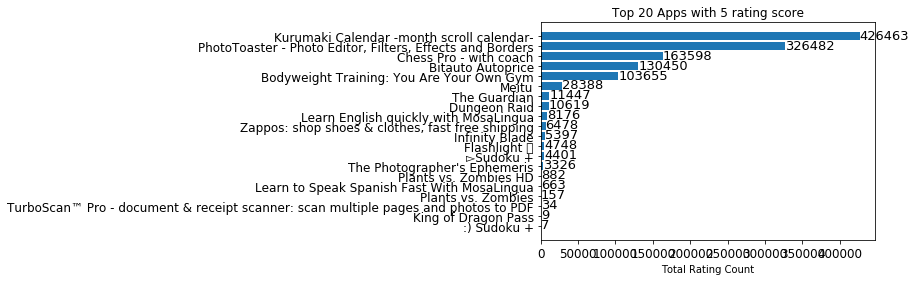

<Figure size 1080x1080 with 0 Axes>

In [6]:
fig, ax = plt.subplots()
ax.tick_params(axis='both', which='major', labelsize=12)

ax.barh(top_track_name, g, align='center',height=0.8)


ax.set_xlabel('Total Rating Count')
ax.set_title('Top 20 Apps with 5 rating score')
plt.figure(figsize=(15,15))

for i in ax.patches:
    ax.text(i.get_width()+3, i.get_y()+.15, str(i.get_width()), fontsize=13)

plt.show()
ax.figure.savefig("Top 20 Apps with 5 rating score.jpg", bbox_inches='tight', dpi=600)

# By this graph you can see that having a 5 star rating is biased and is not a good parameter of evaluating the App popularity. 

In [7]:
free = apple[apple.price==0].count()
paid = apple[apple.price>0].count()
total = apple['price'].count()
#free['price']
#apple[['prime_genre','price']]


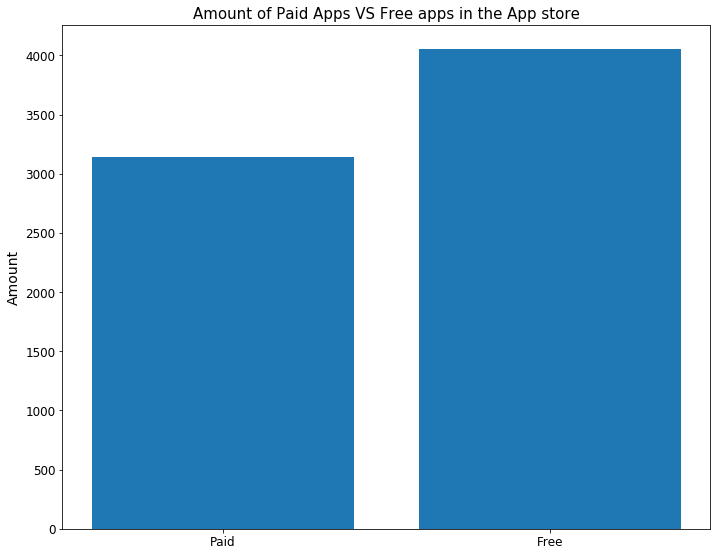

In [8]:
#V
# The Comperison of amount of Paid Apps VS Free apps in the App store
fig = plt.figure(figsize=(9,7))
ab = fig.add_axes([0,0,1,1])
labels_x = ['Paid', 'Free']
amount_y = [paid['price'],free['price']]

ab.tick_params(axis='both', which='major', labelsize=12)

ab.bar(labels_x,amount_y)

plt.title("Amount of Paid Apps VS Free apps in the App store",size=15)
plt.ylabel("Amount",size=14)
plt.savefig("Amount of Paid Apps VS Free apps in the App store.jpg", bbox_inches='tight', dpi=600)
plt.show()

In [48]:
free_ = apple[apple.price==0]
#a =apple['prime_genre'],['price']
#a=apple.groupby('prime_genre')
top_5_free_cat =free_['prime_genre'].value_counts().head()
games=top_5_free_cat['Games']
enter=top_5_free_cat['Entertainment']
photo=top_5_free_cat['Photo & Video']
social=top_5_free_cat['Social Networking']
education=top_5_free_cat['Education']
other_free_gen_price =free_['prime_genre'].value_counts().sum()-games-enter-photo-social-education

#top 5 paid categorys
paid_ = apple[apple.price>0]
top_5_paid_cat =paid_['prime_genre'].value_counts().head()

games_p=top_5_paid_cat['Games']
ed_p=top_5_paid_cat['Education']
ent_p=top_5_paid_cat['Entertainment']
pho_p=top_5_paid_cat['Photo & Video']
uti_p=top_5_paid_cat['Utilities']

other_paid_gen_price =paid_['prime_genre'].value_counts().sum()-games_p-ed_p-pho_p-ent_p-uti_p
other = other_free_gen_price+other_paid_gen_price
precentage_free = free['price']/total*100
precentage_free
precentage_paid = paid['price']/total*100
prec=[precentage_free,precentage_paid]
#precentage_free.as(int)


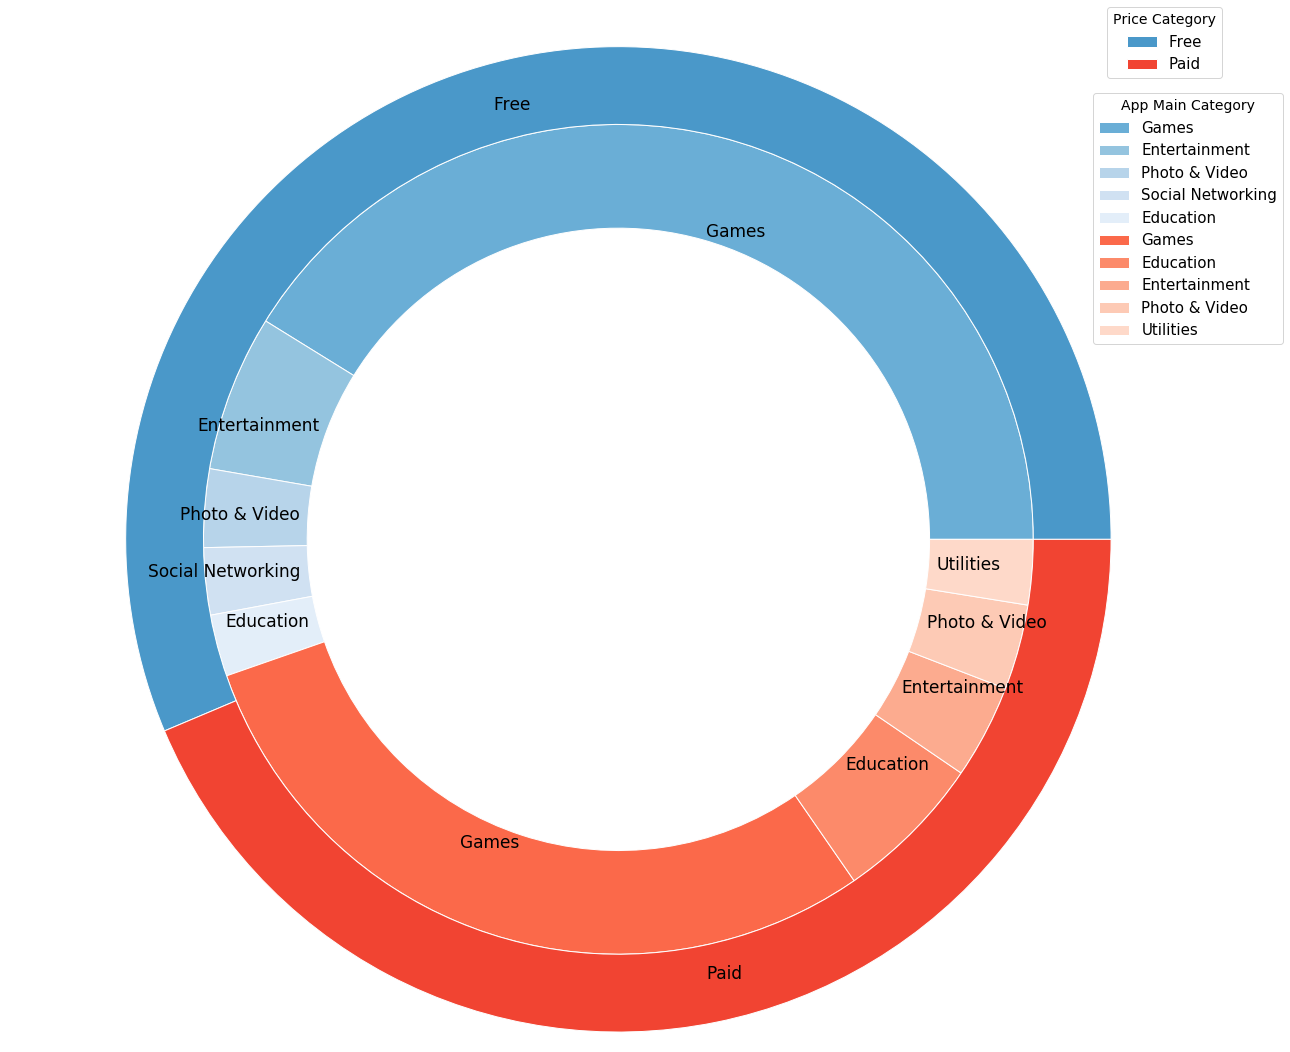

In [10]:
#V
# Make data: I have 3 groups and 7 subgroups
group_names=['Free', 'Paid']
group_size=[free['price'],paid['price']]
subgroup_names=['Games', 'Entertainment', 'Photo & Video', 'Social Networking', 'Education','Games','Education','Entertainment','Photo & Video','Utilities']
subgroup_size=[games,enter,photo,social,education,games_p,ed_p,ent_p,pho_p,uti_p]
 
# Create colors
a, b,c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
fig, ax = plt.subplots(figsize=(20, 16))

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.9-0.3, labels=subgroup_names, labeldistance=0.77, colors=[a(0.5), a(0.4), a(0.3), a(0.2),a(0.1),b(0.5),b(0.4),b(0.3),b(0.2),b(0.15)],textprops={'fontsize': 17})
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)

leg =ax.legend(title="App Main Category",loc='upper right',title_fontsize=14, bbox_to_anchor=(1.05, 1.2),fontsize=15)

# First Ring (outside)
ax.axis('equal')
mypie, _ = ax.pie(group_size,labels=group_names, labeldistance=0.9, radius=1.9, colors=[a(0.6), b(0.6)],textprops={'fontsize': 17} )
plt.setp( mypie, width=0.3, edgecolor='white')
        
#plt.axis('equal')
from matplotlib.legend import Legend
leg2 = ax.legend(mypie,group_names,title="Price Category",loc='lower right',title_fontsize=14, bbox_to_anchor=(1, 1.2),fontsize=15)
ax.add_artist(leg);

# show it
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()
ax.figure.savefig("New Free vs Paid pie.jpg", bbox_inches='tight', dpi=600)




In [50]:
#a=apple.groupby('prime_genre')
#top_5_free_cat =free_['prime_genre'].value_counts().head()

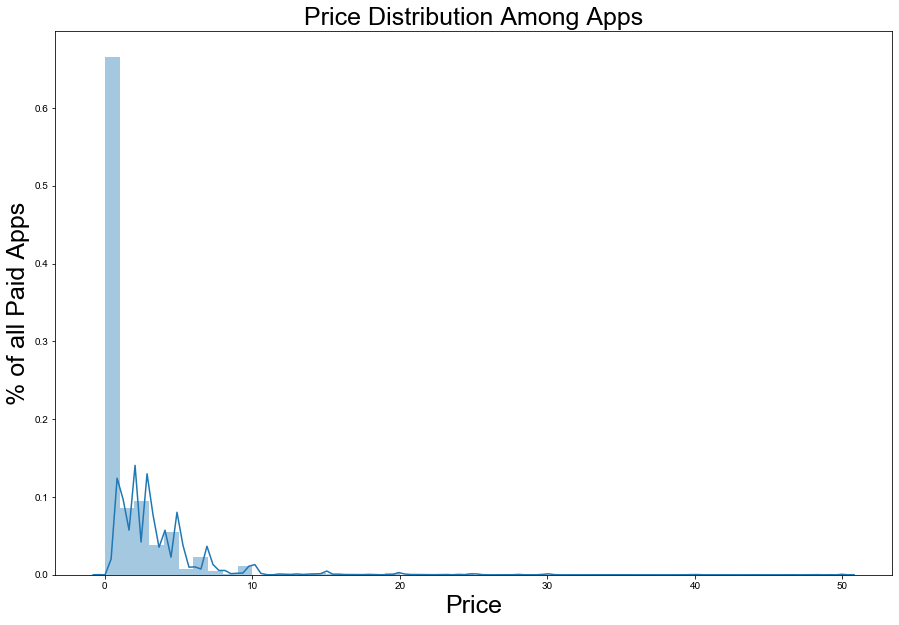

In [13]:
#V
#a=paid[paid['price']<50]
plt.figure(figsize=(15,10))

short_paid = apple[apple.price<50]
ad=sns.distplot(short_paid['price'])
ad.set_title('Price Distribution Among Apps',fontsize=25)
ad.set_ylabel('% of all Paid Apps',fontsize=25)
ad.set_xlabel('Price',fontsize=25)
sns.set(rc={'figure.figsize':(25,15)})
ad.figure.savefig("Price Distribution Among Apps.jpg", bbox_inches='tight', dpi=600)

#avg_paid
#From this graph you can see that most paid apps are between 0 to 5 USD

In [47]:
a=apple.groupby(apple['prime_genre'])

b=a['price'].sum()

amount_of_paid_genre =a['price'].count()
amount_of_free_genre = a

#a['price'].describe()


In [15]:

#fig1, ax1 = plt.subplots()
#ax1.pie(autopct='%1.1f%%',startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
#ax1.axis('equal')  
#plt.tight_layout()
#plt.legend(labels) 
#plt.title("Precentage of total sum ")
#plt.show()

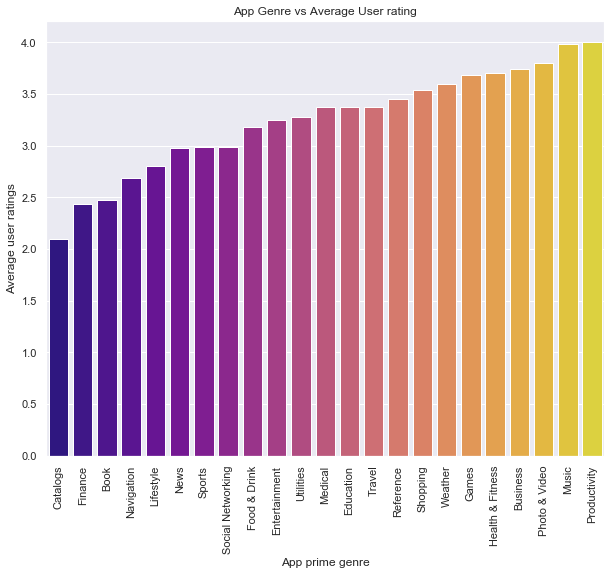

In [16]:
# V
# Getting the mean user ratings for different App genre
mean_user_ratings=apple.groupby('prime_genre')['user_rating'].mean().reset_index().sort_values(by=['user_rating'])

plt.figure(figsize = (10, 8), facecolor = None)
#sns.set_style("darkgrid")
plot = sns.barplot(x="prime_genre", y="user_rating", data=mean_user_ratings,order=mean_user_ratings['prime_genre'],palette = 'plasma')

plot.set_xticklabels(mean_user_ratings['prime_genre'], rotation=90, ha="center")
plot.set(xlabel='App prime genre',ylabel='Average user ratings')
plot.set_title('App Genre vs Average User rating')
plot.figure.savefig("App Genre vs Average User rating.jpg", bbox_inches='tight', dpi=600)
# An overview of user rating acording to App prime genre

# Now, does having paid for the app effect the user rating?


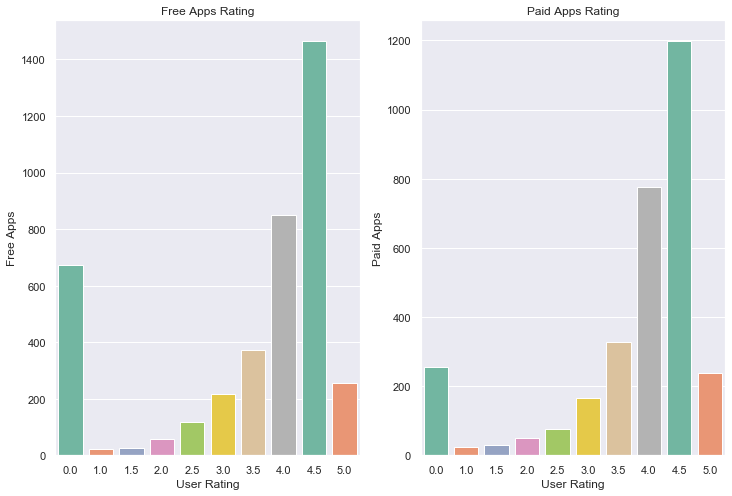

In [17]:
#V
# Now does having paid for the app effect the user rating?
free_apps=apple[apple['price']==0]
paid_apps=apple[apple['price']>0]

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
ax1=sns.countplot('user_rating',data=free_apps,palette="Set2")
plt.title('Free Apps Rating')
plt.xlabel('User Rating')
plt.ylabel('Free Apps')

plt.subplot(1,2,2)
ax2=sns.countplot('user_rating',data=paid_apps,palette="Set2")
plt.title('Paid Apps Rating')
plt.xlabel('User Rating')
plt.ylabel('Paid Apps')
plt.savefig("Free Apps Rating vs Paid Apps Rating.jpg", bbox_inches='tight', dpi=600)


15 Most Rated Apps and their genre

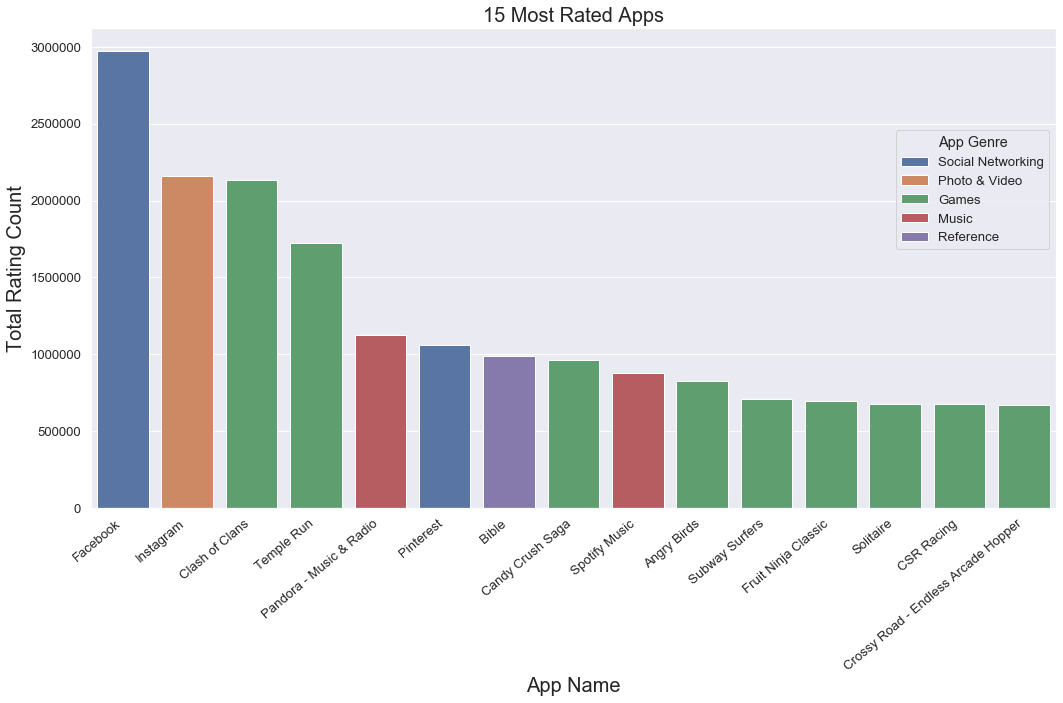

In [18]:
#V
sns.set(font_scale=1.2)  # getting the parameters slightly bigger

plt.figure(figsize=(15,10))
sorted_rating_count_tot =apple.sort_values(by='rating_count_tot',ascending=False)
most_rated_apps = sorted_rating_count_tot.head(15)
x=most_rated_apps['track_name']
y=most_rated_apps['rating_count_tot']

s=sns.barplot(x,y,hue=most_rated_apps['prime_genre'],dodge=False,)
s.legend(title="App Genre",loc='upper right', bbox_to_anchor=(1, 0.8))
plt.xlabel('App Name',fontsize=20)
plt.ylabel('Total Rating Count',fontsize=20)
plt.title('15 Most Rated Apps',fontsize=20)

#rotating the x-labels
s.set_xticklabels(s.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.savefig("15 Most Rated Apps and their genre.jpg", bbox_inches='tight', dpi=600)


In [19]:
most_rated_apps.groupby('prime_genre').describe()

price                                                \
                  count      mean       std  min  25%  50%  75%   max   
prime_genre                                                             
Games               9.0  0.221111  0.663333  0.0  0.0  0.0  0.0  1.99   
Music               2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.00   
Photo & Video       1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.00   
Reference           1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.00   
Social Networking   2.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.00   

                  rating_count_tot                ... lang.num        \
                             count          mean  ...      75%   max   
prime_genre                                       ...                  
Games                          9.0  1.007956e+06  ...    13.00  24.0   
Music                          2.0  1.002721e+06  ...    13.75  18.0   
Photo & Video                  1.0  2.161558e+06  ...    29.00  29.0   
Reference                      1.0  9.859200e+05  ...    45.00  45.0   
Social Networking              2.0  2.018150e+06  ...    28.50  29.0   

                  size_bytes_in_MB                                        \
                             count        mean         std    min    25%   
prime_genre                                                                
Games                          9.0  172.555556  130.758471   62.0   99.0   
Music                          2.0  125.000000    1.414214  124.0  124.5   
Photo & Video                  1.0  108.000000         NaN  108.0  108.0   
Reference                      1.0   88.000000         NaN   88.0   88.0   
Social Networking              2.0  221.000000  212.132034   71.0  146.0   

                                        
                     50%    75%    max  
prime_genre                             
Games              148.0  167.0  500.0  
Music              125.0  125.5  126.0  
Photo & Video      108.0  108.0  108.0  
Reference           88.0   88.0   88.0  
Social Networking  221.0  296.0  371.0  

[5 rows x 64 columns]

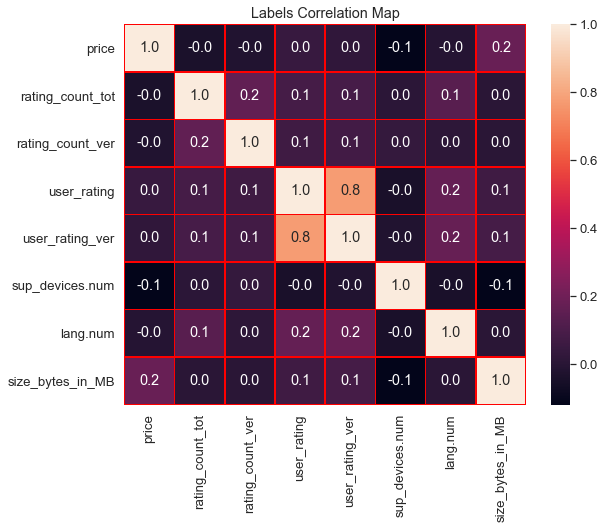

In [20]:
#Correlation Map V
f,ax=plt.subplots(figsize=(9,7))
sns.heatmap(apple.corr(),annot=True,linewidth=0.5,linecolor="red",fmt=".1f",ax=ax)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.51)

ax.set_title('Labels Correlation Map')
plt.savefig("Correlation Map.jpg", bbox_inches='tight', dpi=600)

plt.show()


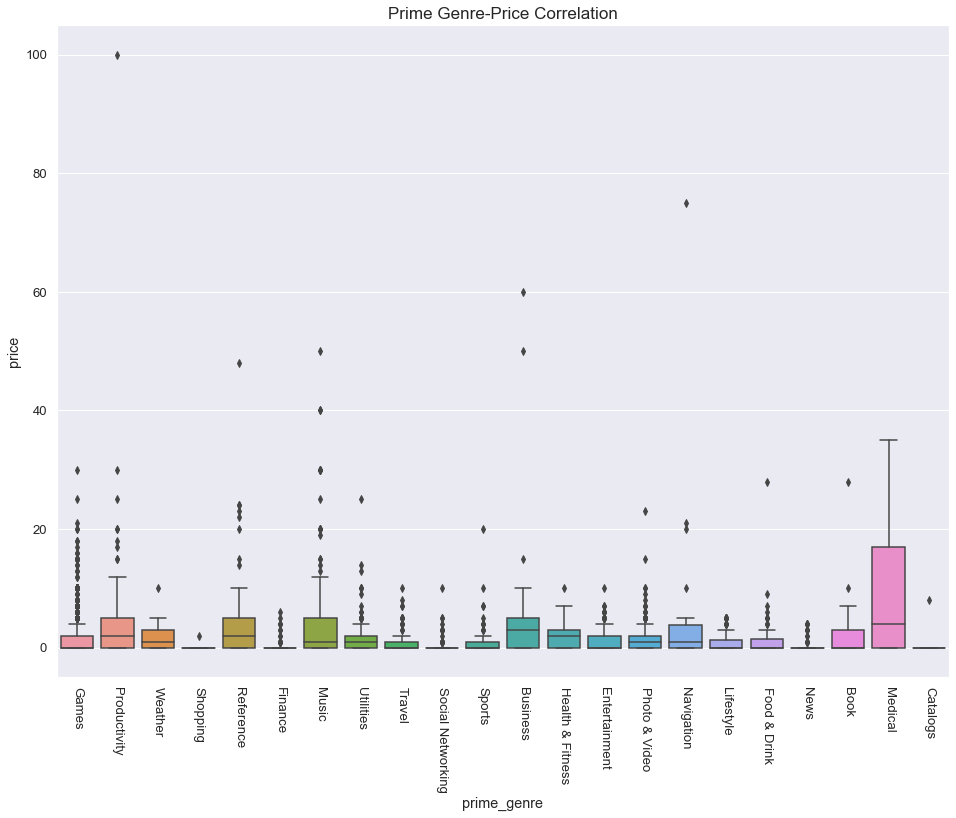

In [21]:
#V
sns.set(font_scale=1.2)
plt.figure(figsize=(16,12))
sns.boxplot(data=apple[apple.prime_genre != 'Education'], x="prime_genre", y="price")
plt.xticks(rotation=-90)
plt.title('Prime Genre-Price Correlation',fontsize=17)
plt.savefig("Prime Genre-Price Correlation.jpg", bbox_inches='tight', dpi=600)


In [32]:
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')


#z=apple['rating_count_tot']
#Axes3D.plot_wireframe(ax, x, y, z)


In [31]:
#Axes3D.scatter(self, xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, *args, **kwargs)[source]
#a = apple.groupby(apple['sup_devices.num'])
#b=apple[['sup_devices.num','user_rating']]
#b

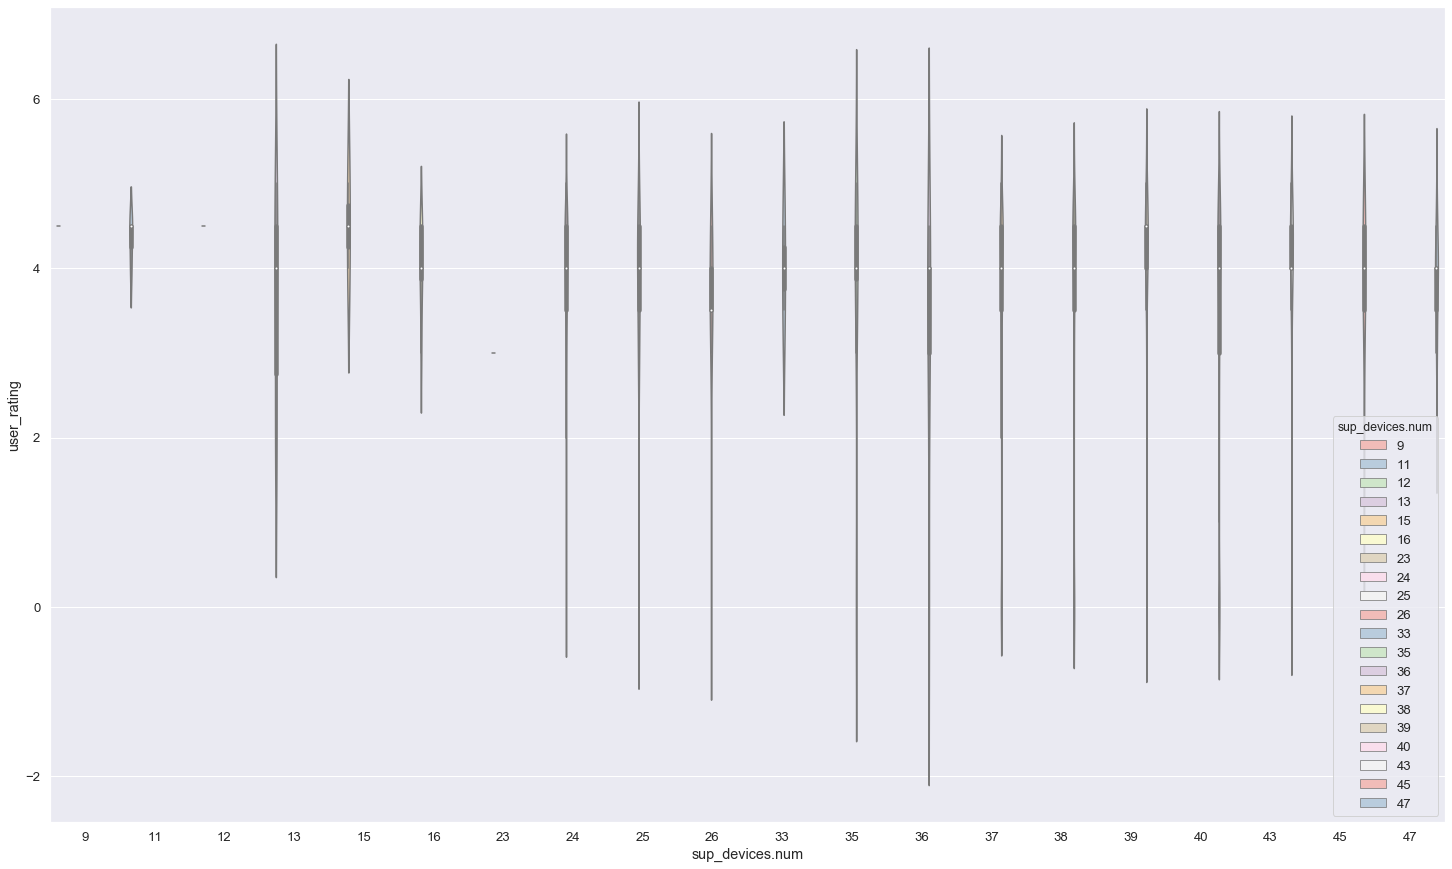

In [24]:
#sns.violinplot(x="sup_devices.num", y="user_rating", hue="sup_devices.num", data=b, palette="Pastel1")


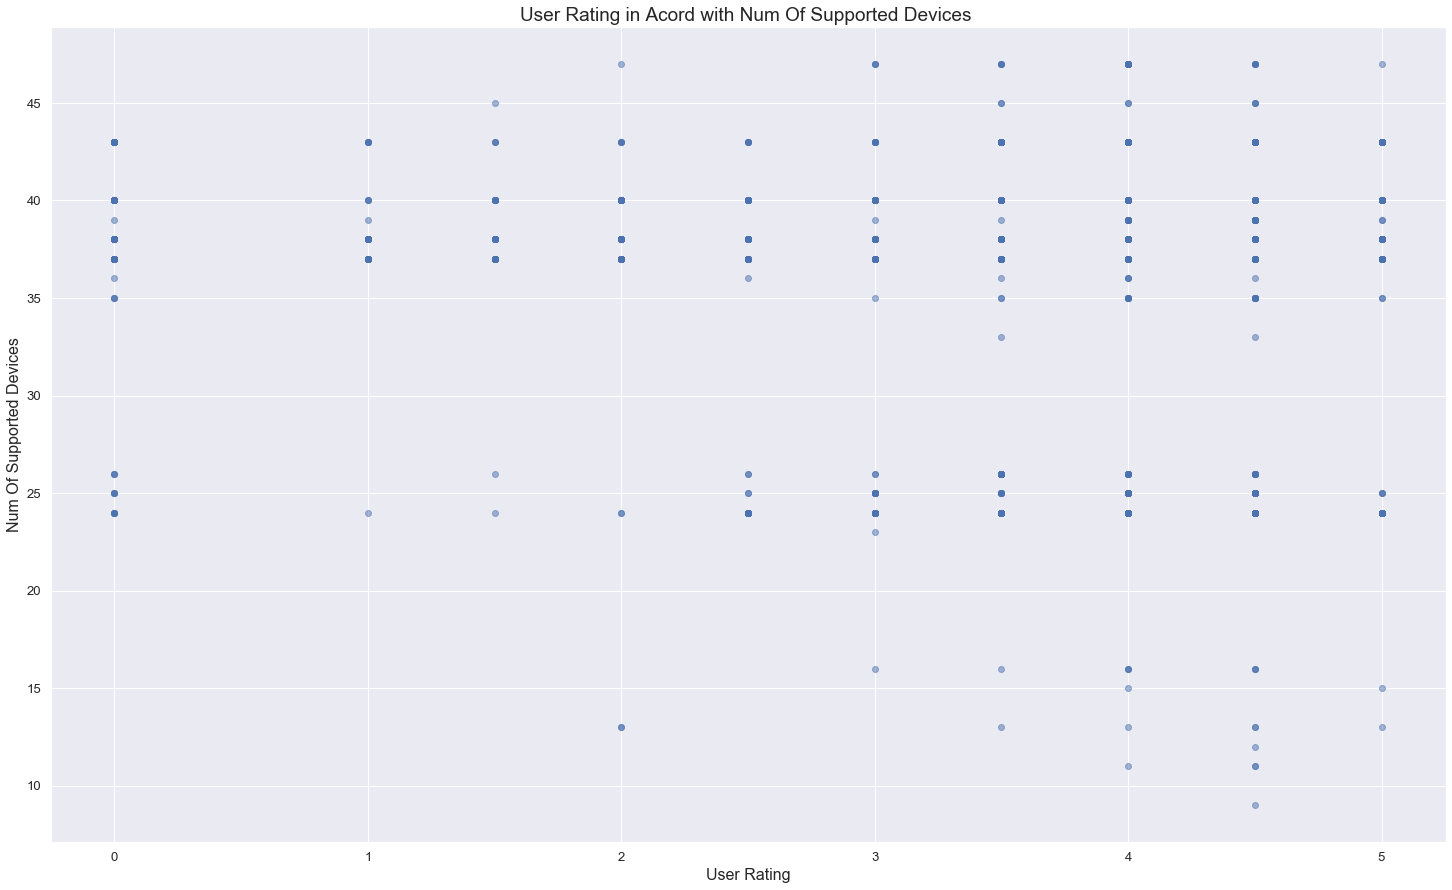

In [46]:
f=apple[['sup_devices.num','user_rating']]

y=apple['sup_devices.num']
x=apple['user_rating']

plt.scatter(x,y,cmap='summer',alpha=0.5)

plt.ylabel('Num Of Supported Devices', fontsize=16)
plt.xlabel('User Rating', fontsize=16)
plt.title('User Rating in Acord with Num Of Supported Devices ', fontsize=19)

plt.savefig("User Rating in Acord with Num Of Supported Devices.jpg", bbox_inches='tight', dpi=600)

#cbar = plt.colorbar()
#cbar.set

C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


<Figure size 1152x864 with 0 Axes>

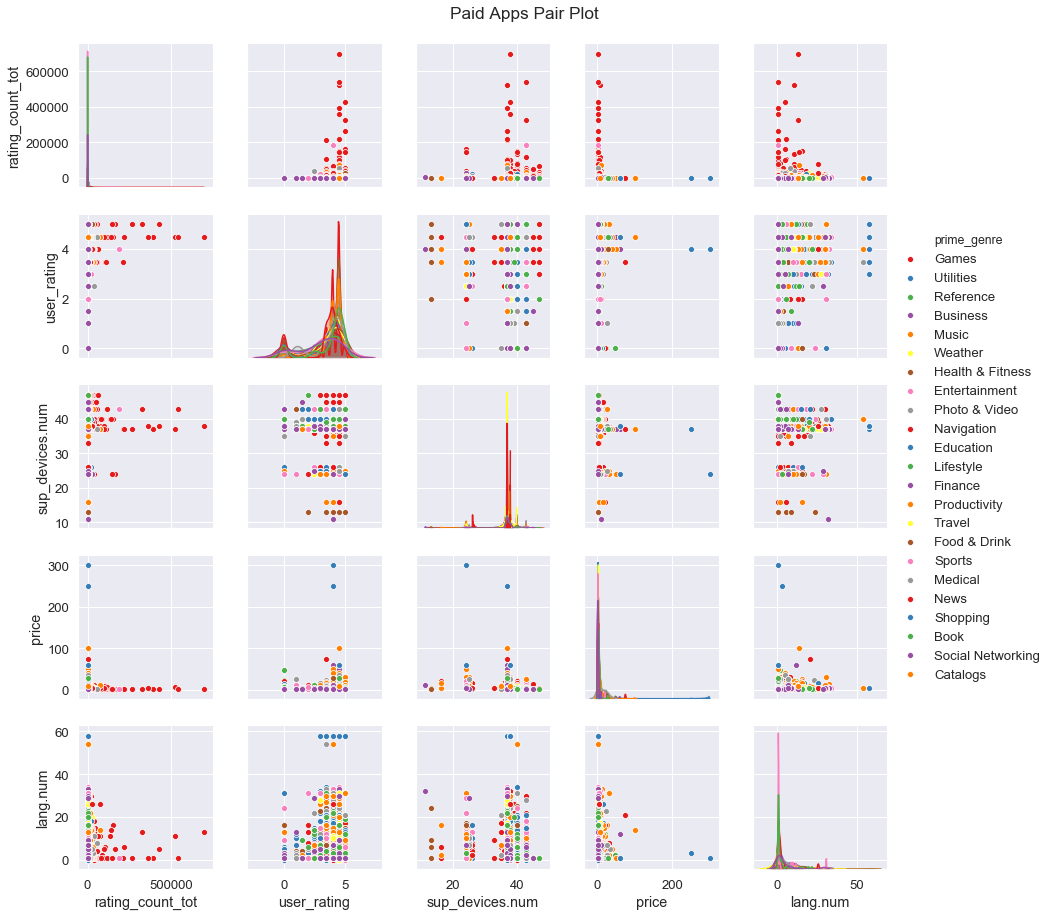

In [26]:
#Paid Apps Pair Plot
sns.set(font_scale=1.2)
plt.figure(figsize=(16,12))

numCol = paid_apps[['rating_count_tot', 'user_rating', 'sup_devices.num', 'price', 'lang.num', 'prime_genre']]
g = sns.pairplot(data = numCol, dropna=True, hue='prime_genre',palette='Set1')

g.fig.suptitle("Paid Apps Pair Plot", y=1.02)
g.fig.savefig("Paid Apps Pair Plot.jpg", bbox_inches='tight', dpi=600)



<Figure size 1152x864 with 0 Axes>

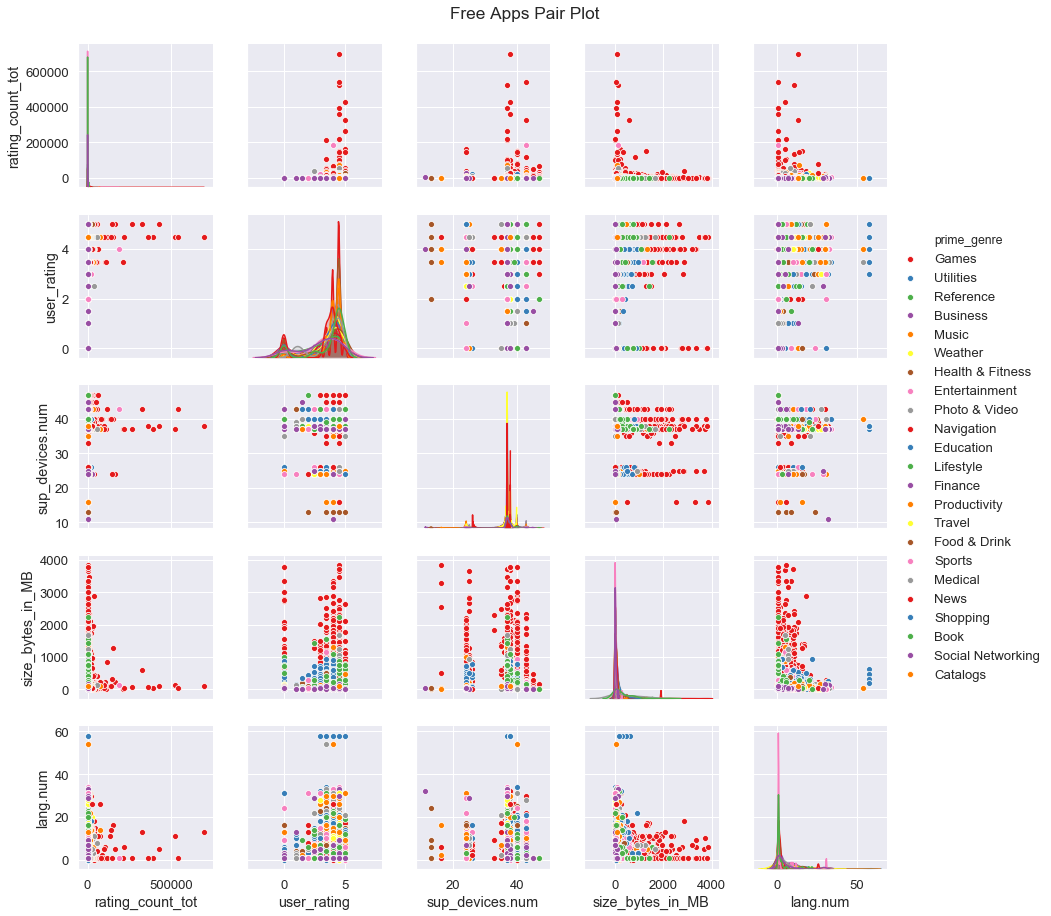

In [28]:
#Free Apps Pair Plot
sns.set(font_scale=1.2)
plt.figure(figsize=(16,12))

numCol = paid_apps[['rating_count_tot', 'user_rating', 'sup_devices.num', 'size_bytes_in_MB', 'lang.num', 'prime_genre']]
pair_free = sns.pairplot(data = numCol, dropna=True, hue='prime_genre',palette='Set1')

pair_free.fig.suptitle("Free Apps Pair Plot", y=1.02)
pair_free.fig.savefig("Free Apps Pair Plot.jpg", bbox_inches='tight', dpi=600)



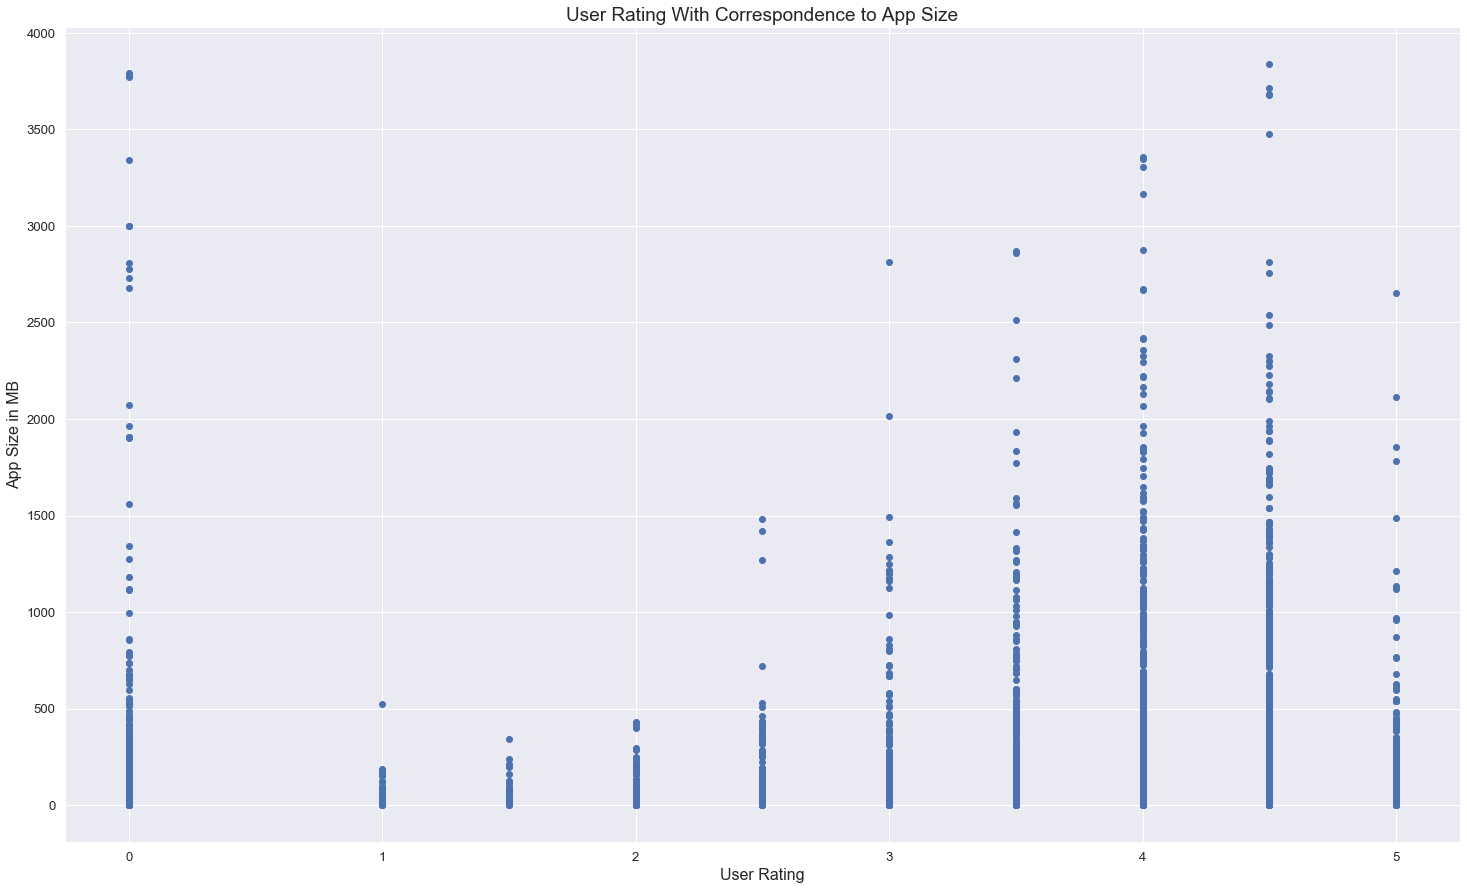

In [40]:
plt.scatter(apple['user_rating'], apple['size_bytes_in_MB'])

plt.xlabel('User Rating', fontsize=16)
plt.ylabel('App Size in MB', fontsize=16)
plt.title('User Rating With Correspondence to App Size', fontsize=19)

plt.savefig("User Rating With Correspondence to App Size.jpg", bbox_inches='tight', dpi=600)
